In [70]:
import numpy as np
from matplotlib import pyplot as plt
import skimage
import scipy

In [71]:
image1 = skimage.io.imread('Data-2/cells/9343 AM.bmp', as_gray=True)
image2 = skimage.io.imread('Data-2/cells/10905 JL.bmp', as_gray=True)
image3 = skimage.io.imread('Data-2/cells/43590 AM.bmp', as_gray=True)

In [72]:
imageGT1 = skimage.io.imread('Data-2/cells/9343 AM Edges.bmp', as_gray=True)
imageGT2 = skimage.io.imread('Data-2/cells/10905 JL Edges.bmp', as_gray=True)
imageGT3 = skimage.io.imread('Data-2/cells/43590 AM Edges.bmp', as_gray=True)

def roc(filtered, groundTruth):
    groundTruth = np.logical_not(groundTruth/255)

    TP = np.sum((filtered == 1) & (groundTruth == 1))
    FP = np.sum((filtered == 1) & (groundTruth == 0))
    TN = np.sum((filtered == 0) & (groundTruth == 0))
    FN = np.sum((filtered == 0) & (groundTruth == 1))

    # Compute TPR and FPR
    tpr = TP / (TP + FN) if (TP + FN) != 0 else 0
    fpr = FP / (FP + TN) if (FP + TN) != 0 else 0

    # formatted_tpr = "{:.4f}".format(tpr)
    # formatted_fpr = "{:.4f}".format(fpr)
    formatted_tpr = round(tpr, 4)
    formatted_fpr = round(fpr, 4)


    print(f'Sobel: TPR {formatted_tpr} FPR {1-formatted_fpr}')

    

In [73]:
def zero_cross(image):
    z_c_image = np.zeros(image.shape)
    thresh = np.absolute(image).mean() * 0.9
    h,w = image.shape
    for y in range(1, h - 1):
        for x in range(1, w - 1):
            patch = image[y-1:y+2, x-1:x+2]
            p = image[y, x]
            maxP = patch.max()
            minP = patch.min()
            if (p > 0):
                zeroCross = True if minP < 0 else False
            else:
                zeroCross = True if maxP > 0 else False
            if ((maxP - minP) > thresh) and zeroCross:
                z_c_image[y, x] = 1
    return z_c_image

In [74]:
def laplacian_edge_detector(image):
    laplacian_kernel = np.array([[0,1,0],
                                 [1,-4,1],
                                 [0,1,0]])
    
    laplacian_image = scipy.ndimage.convolve(image, laplacian_kernel)

    return laplacian_image

In [75]:
laplacian_edge_image1 = laplacian_edge_detector(image1)
laplacian_edge_image2 = laplacian_edge_detector(image2)
laplacian_edge_image3 = laplacian_edge_detector(image3)

In [76]:
th_1 = skimage.filters.threshold_otsu(laplacian_edge_image1)
th_2 = skimage.filters.threshold_otsu(laplacian_edge_image2)
th_3 = skimage.filters.threshold_otsu(laplacian_edge_image3)

print(th_1)
print(th_2)
print(th_3)


thresholded_1 = laplacian_edge_image1 > th_1
thresholded_2 = laplacian_edge_image2 > th_2
thresholded_3 = laplacian_edge_image3 > th_3

roc(thresholded_1, imageGT1)
roc(thresholded_2, imageGT2)
roc(thresholded_3, imageGT3)


-0.03383401271446079
-0.006482246476715747
-0.0034622694546568855
Sobel: TPR 0.8827 FPR 0.046699999999999964
Sobel: TPR 0.5869 FPR 0.271
Sobel: TPR 0.5895 FPR 0.30479999999999996


(-0.5, 1279.5, 1023.5, -0.5)

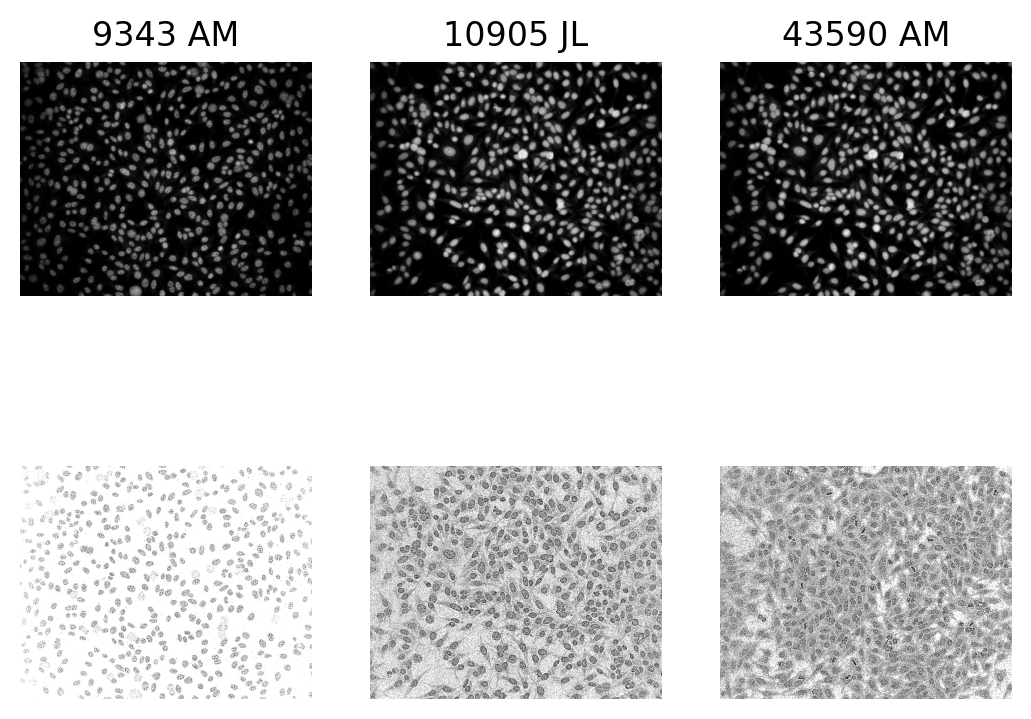

In [77]:
plt.figure(dpi=200)

plt.subplot(2,3,1)
plt.imshow(image1, cmap='gray')
plt.title('9343 AM')
plt.axis('off')

plt.subplot(2,3,2)
plt.imshow(image2, cmap='gray')
plt.title('10905 JL')
plt.axis('off')

plt.subplot(2,3,3)
plt.imshow(image2, cmap='gray')
plt.title('43590 AM')
plt.axis('off')

plt.subplot(2,3,4)
plt.imshow(thresholded_1, cmap='gray')
plt.axis('off')

plt.subplot(2,3,5)
plt.imshow(thresholded_2, cmap='gray')
plt.axis('off')

plt.subplot(2,3,6)
plt.imshow(thresholded_3, cmap='gray')
plt.axis('off')
